# INM701 Coursework
## Imtiaz Ali 200022830

The goal is to use regression to predict if a UFC fighter wins more often based on features such height to weight ratio, Significant strikes landed and absorbed, takedowns attempted and defended and also submission attempts.

4100+ records, with 18 features.


### Printing the Dataset

In [35]:
import os
import pandas as pd
import numpy as np

path = "."
filename_read = ("ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,sig_strikes_landed_min,sig_strike_acc,sig_strikes_absorbed_min,sig_strike_def,avg_takedowns_landed_per_15_min,takedown_acc,takedown_def,avg_sub_attempted_15_min
0,Tom Tuggle,The Law,0,3,0,187.96,113.40,NaN,Orthodox,NaN,0.00,0,2.14,0,32.14,100,0,0.00
1,Theo Rlayang,Jungle King,5,1,0,170.18,65.77,165.10,Orthodox,10/08/1994,5.93,48,8.40,40,2.00,40,0,5.93
2,Frank Shamrock,NaN,23,10,2,177.80,83.91,NaN,Orthodox,08/12/1972,4.75,53,4.66,57,0.35,50,37,4.75
3,Jason Brilz,Hitman,22,6,1,180.34,92.99,180.34,Orthodox,07/07/1975,2.66,40,1.78,65,2.37,25,25,2.66
4,Glaico Franca Moreira,Nego,15,5,0,182.88,70.31,195.58,Orthodox,28/02/1991,2.35,42,3.46,47,2.68,42,76,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,Waldo Cortes-Acosta,Salsa Boy,10,1,0,193.04,117.93,198.12,Orthodox,03/10/1991,6.97,50,4.06,52,0.00,0,60,6.97
4105,Brandon Sayles,Man of War,5,1,0,195.58,120.20,NaN,NaN,NaN,0.00,0,0.00,0,0.00,0,0,0.00
4106,Elizabeth Phillips,NaN,6,6,0,167.64,61.23,165.10,Orthodox,20/08/1986,2.60,33,3.07,58,0.75,25,53,2.60
4107,Dave Galera,Scarecrow,5,1,0,180.34,61.23,NaN,Orthodox,12/01/1978,1.67,69,0.53,33,0.00,0,14,1.67


### Drop dataset columns and fill in blank values.

In [54]:
import os
import pandas as pd
import numpy as np

path = "."

filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Get a list of all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply median imputation to all numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Calculate the current ratio of the three string values in the column
value_counts = df['stance'].value_counts(normalize=True)

# Fill empty cells with the values based on the current ratio
df['stance'] = df['stance'].fillna(pd.Series(np.random.choice(value_counts.index, p=value_counts.values, size=len(df))))

columns_to_drop = ['name', 'nickname','date_of_birth']

# Drop columns if they exist
for column_to_drop in columns_to_drop:
    if column_to_drop in df.columns:
        df.drop(column_to_drop, axis=1, inplace=True)
    else:
        print(f"Column '{column_to_drop}' not found in DataFrame.")
df.to_csv("C:/Users/imtia/Desktop/INM701/newufc.csv", index=False)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df


,wins,losses,draws,height_cm,weight_kg,reach_in_cm,stance,sig_strikes_landed_min,sig_strike_acc,sig_strikes_absorbed_min,sig_strike_def,avg_takedowns_landed_15_min,takedown_acc,takedown_def,avg_sub_attempt_15_min
0,11,7,0,177.80,70.31,182.88,Switch,0.00,0,0.00,0,0.00,0,0,0.00
1,9,2,0,187.96,77.11,190.50,Orthodox,6.02,50,8.10,33,3.11,100,0,6.02
2,10,2,0,200.66,107.95,198.12,Orthodox,2.21,57,7.83,37,0.00,0,0,2.21
3,19,6,0,165.10,56.70,172.72,Southpaw,5.12,54,4.51,59,0.65,37,77,5.12
4,1,1,0,185.42,83.91,182.88,Orthodox,0.00,0,1.93,30,4.13,100,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,12,5,0,165.10,61.23,182.88,Orthodox,3.57,41,4.63,62,4.00,42,83,3.57
4105,7,1,1,165.10,56.70,167.64,Orthodox,0.60,36,3.33,43,1.00,33,0,0.60
4106,11,20,0,195.58,158.76,182.88,Orthodox,3.19,55,1.88,49,0.58,100,72,3.19
4107,4,6,0,177.80,65.77,182.88,Orthodox,1.71,50,2.19,62,1.43,25,0,1.71


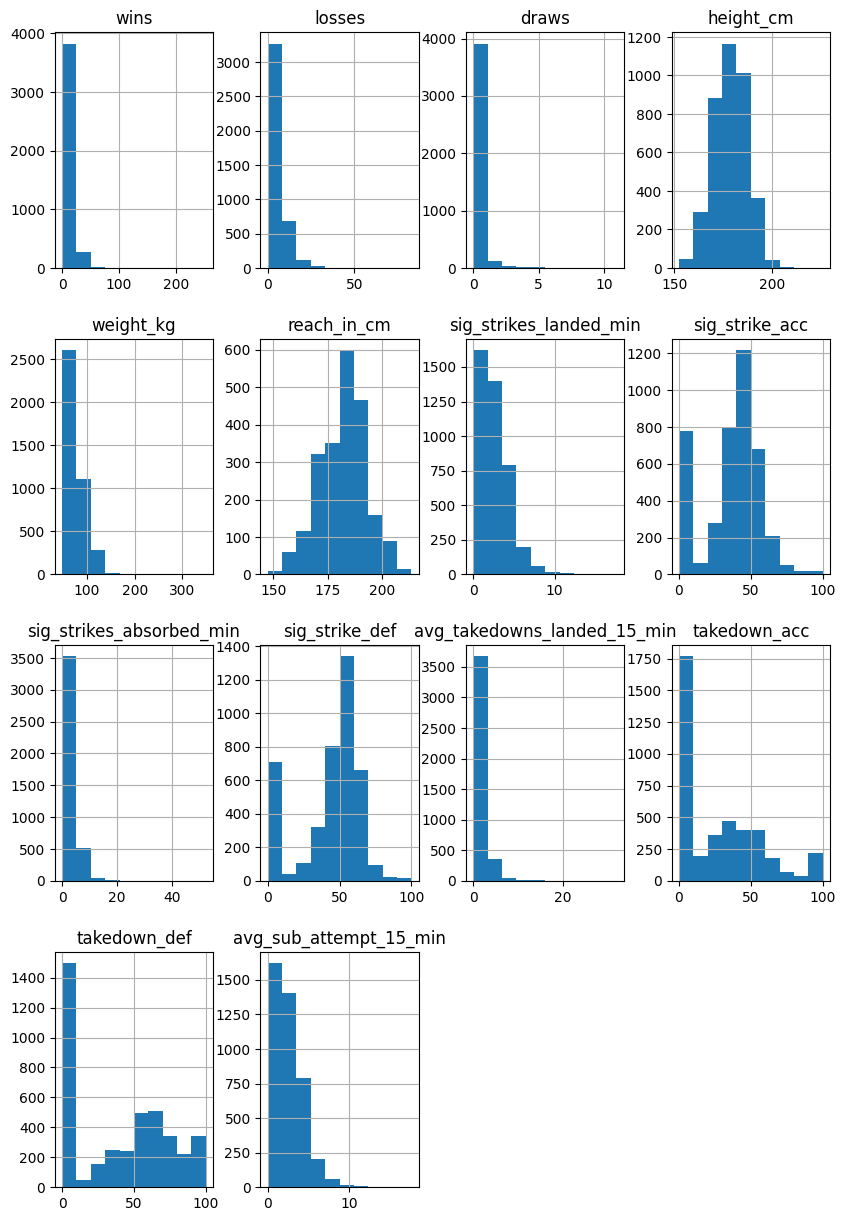

In [42]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "."

filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])


# Data distribution using histograms
df.hist(figsize=(10, 15))
plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


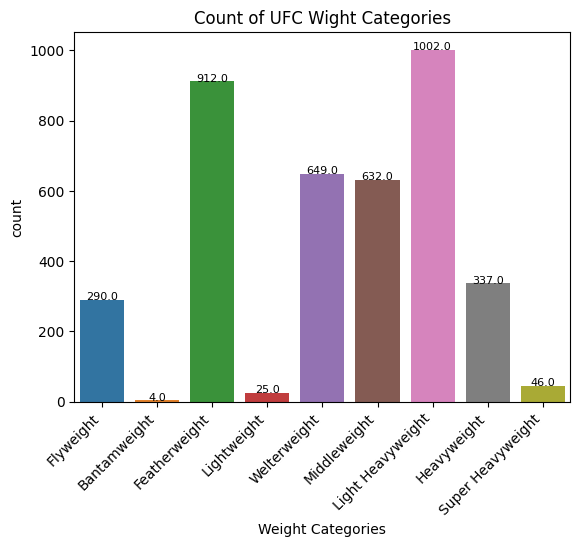

In [48]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "."
filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Define UFC weight categories
weight_categories = {
    'Strawweight': (0, 52.5),
    'Flyweight': (52.5, 56.7),
    'Bantamweight': (56.7, 61.2),
    'Featherweight': (61.2, 65.8),
    'Lightweight': (65.8, 70.3),
    'Welterweight': (70.3, 77.1),
    'Middleweight': (77.1, 83.9),
    'Light Heavyweight': (83.9, 102.1),
    'Heavyweight': (102.1, 120.2),
    'Super Heavyweight': (120.2, float('inf'))
}
# Categorize weights based on UFC weight categories
df['weight_category'] = pd.cut(df['weight_kg'], bins=[0] + [upper for (_, upper) in weight_categories.values()], labels=weight_categories.keys())

# Define the desired order of categories
weight_order = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 
                 'Middleweight', 'Light Heavyweight', 'Heavyweight','Super Heavyweight']

# Now you can create your plots with the specified order
ax = sns.countplot(x='weight_category', data=df, order=weight_order)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black')
plt.title('Count of UFC Wight Categories')
plt.xlabel('Weight Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


### Splitting the data into Training, Validation and Testing

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
filename_read = ("ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

print(df[:5])

# Assuming 'label_column' is the name of the column containing your target variable (labels)
X = df.drop('wins', axis=1)  # Features
y = df['wins']  # Labels

# Perform the split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets to verify the split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

                 name                  nickname  wins  losses  draws  \
0        Rex Richards                       NaN     7       2      0   
1        Luana Santos                       NaN     6       1      0   
2  Cortavious Romious  Are You Not Entertained?     7       2      0   
3         Danny Silva                   El Puma     8       1      0   
4       Angel Pacheco                       NaN     7       2      0   

   height_cm  weight_kg  reach_in_cm    stance date_of_birth  \
0     195.58     120.20          NaN       NaN           NaN   
1     167.64      56.70       170.18  Orthodox    16/04/2000   
2     162.56      61.23       172.72  Southpaw    06/01/1994   
3     180.34      65.77       177.80    Switch    30/01/1997   
4     172.72      65.77       177.80  Orthodox    13/01/1992   

   sig_strikes_landed_min  sig_strike_acc  sig_strikes_absorbed_min  \
0                   17.65              58                      5.29   
1                   17.10              6